In [1]:
import pandas as pd  # Import the pandas library
# Read csv file. Indicate that there is no row with 1 column titles
df = pd.read_csv('./data/testvectors.csv', header=None)
print(df.head(5), "\n")  # Printthefirst5rowsofthedataframe
count_row = df.shape[0]  # Givesnumberofrows
count_col = df.shape[1]  # Givesnumberofcolumns
print("\nTotalwords:", count_row)
print("Dimensions:", count_col-1)  # Subtract1forthewordcolumn

     0         1         2         3         4         5         6    \
0    one  0.073525 -0.031703  0.054010 -0.040015 -0.011894  0.002958   
1   time  0.061892  0.066106  0.026482 -0.122901  0.016603  0.024152   
2  would -0.005455 -0.064055  0.106359  0.000271 -0.005658  0.017313   
3   made -0.033224 -0.046773 -0.022644 -0.115277 -0.037984  0.109500   
4   well  0.032183  0.058166  0.102063 -0.054714 -0.037364  0.013909   

        7         8         9    ...       291       292       293       294  \
0 -0.065406  0.079166  0.099932  ...  0.048875  0.014754 -0.038729  0.033155   
1 -0.057542  0.119501  0.033247  ... -0.043285  0.045578 -0.139174  0.109938   
2 -0.030339  0.014298  0.030399  ... -0.029693  0.083669 -0.089212  0.063672   
3 -0.138488  0.038567  0.001758  ...  0.005144  0.002312 -0.043491  0.091255   
4  0.025827  0.072022 -0.050159  ...  0.017727  0.056166 -0.106694  0.046184   

        295       296       297       298       299       300  
0 -0.120390 -0.065746 

In [2]:
# Convert thefirstcolumnofthedataframetoalistandstoretoa variable
available_words = df[0].tolist()
print(available_words)

['one', 'time', 'would', 'made', 'well', 'family', 'use', 'took', 'could', 'home', 'served', 'large', 'like', 'day', 'final', 'near', 'much', 'book', 'came', 'late', 'side', 'started', 'way', 'take', 'without', 'old', 'making', 'field', 'never', 'across', 'see', 'features', 'seen', 'mother', 'either', 'get', 'close', 'reached', 'white', 'change', 'female', 'beginning', 'allowed', 'night', 'week', 'natural', 'ran', 'thought', 'woman', 'room', 'nearly', 'sister', 'acquired', 'whether', 'ancient', 'actually', 'feet', 'bank', 'floor', 'occurred', 'stone', 'twice', 'visit', 'say', 'quite', 'castle', 'think', 'pop', 'shape', 'getting', 'reading', 'nothing', 'boy', 'standing', 'mind', 'ahead', 'weather', 'let', 'door', 'feel', 'step', 'eyes', 'hot', 'hair', 'moment', 'worth', 'afterwards', 'departure', 'shall', 'lay', 'passage', 'watch', 'looked', 'seemed', 'bed', 'sitting', 'pictures', 'feeling', 'hear', 'generations', 'trouble', 'warm', 'suddenly', 'considering', 'burning', 'remarkable', 'b

In [3]:
word_embeddings = dict()
for i in range(count_row):  # Iterate through all rows in dataframe (words)
    word = df.iloc[i, 0]  # Get word
    # Get embedding and convert to float numpy array
    embedding = df.iloc[i, 1:count_col].to_numpy(dtype=float)
    word_embeddings[word] = embedding
# Print the first 7 elements of the embedding for word "mother"
print("mother->", word_embeddings["mother"][0:7])
# Print the first 7 elements of the embedding for word "boy"
print("boy->", word_embeddings["boy"][0:7])

mother-> [ 0.007815  0.026617 -0.036383 -0.051246  0.000183  0.071259  0.017416]
boy-> [ 0.040253  0.001048  0.023576  0.003103 -0.027837  0.035486  0.04829 ]


In [4]:
from scipy.spatial import distance
test_words = ["mother", "boy", "sister", "family", "home", "rabbit", "eyes"]
print("%6s" % "", end="")
for word in test_words:
    print("\t%6s" % word, end="")
print("")
for word1 in test_words:
    print("%6s" % word1, end="")
    for word2 in test_words:
        print("\t%1.4f" % distance.cosine(
            word_embeddings[word1], word_embeddings[word2]), end="")
    print("")

      	mother	   boy	sister	family	  home	rabbit	  eyes
mother	0.0000	0.4318	0.3882	0.4893	0.7175	0.7303	0.7059
   boy	0.4318	0.0000	0.6213	0.7388	0.8153	0.6080	0.6594
sister	0.3882	0.6213	0.0000	0.6224	0.7767	0.8759	0.8403
family	0.4893	0.7388	0.6224	0.0000	0.7678	0.8327	0.8262
  home	0.7175	0.8153	0.7767	0.7678	0.0000	0.8341	0.8851
rabbit	0.7303	0.6080	0.8759	0.8327	0.8341	0.0000	0.6599
  eyes	0.7059	0.6594	0.8403	0.8262	0.8851	0.6599	0.0000


In [5]:
from nltk import word_tokenize # Import the word_tokenize function from NLTK
text1 = "My mother was sitting on the bed"
text2 = "The night looked remarkable at the beginning"
tokens1 = word_tokenize(text1.lower()) # Tokenise "text1" into words
tokens2 = word_tokenize(text2.lower()) # Tokenise "text1" into words
words_list1 = []
for word in tokens1:
    words_list1.append(word)
print(text1,"->",words_list1)
words_list2 = []
for word in tokens2:
    words_list2.append(word)
print(text2,"->",words_list2)

My mother was sitting on the bed -> ['my', 'mother', 'was', 'sitting', 'on', 'the', 'bed']
The night looked remarkable at the beginning -> ['the', 'night', 'looked', 'remarkable', 'at', 'the', 'beginning']


In [6]:
print("Text1 word embeddings:")
for word in words_list1:
    try:
        print(word,"->",word_embeddings[word][0:4]) # Print first 4 elements of embedding
    except:
        print(word,"-> n/a")
print("\nText2 word embeddings:")
for word in words_list2:
    try:
        print(word,"->",word_embeddings[word][0:4]) # Print first 4 elements of embedding
    except:
        print(word,"-> n/a")

Text1 word embeddings:
my -> n/a
mother -> [ 0.007815  0.026617 -0.036383 -0.051246]
was -> n/a
sitting -> [9.7000e-05 4.1846e-02 8.3230e-02 5.5060e-03]
on -> [ 0.005252 -0.002234 -0.0648   -0.001852]
the -> [ 0.016258 -0.013271 -0.007168 -0.083179]
bed -> [ 0.0882    0.056767 -0.021443  0.014364]

Text2 word embeddings:
the -> [ 0.016258 -0.013271 -0.007168 -0.083179]
night -> [ 0.06248  -0.051441 -0.023803  0.038181]
looked -> [-0.011535  0.016638  0.063261 -0.033455]
remarkable -> [ 0.065266 -0.021301  0.060876  0.068074]
at -> n/a
the -> [ 0.016258 -0.013271 -0.007168 -0.083179]
beginning -> [-0.017209  0.131408  0.024707 -0.036714]


In [7]:
import numpy as np


def get_document_embedding(word_list, word_embeddings, k):
    # Create embedding of k zero-valued elements
    document_embedding = np.zeros(k, dtype=float)
    valid_words = 0
    for word in word_list:
        try:
            document_embedding = document_embedding + \
                word_embeddings[word][0:k]  # Add word embeddingto partial sum
            valid_words += 1
        except:
            pass  # If word embedding is not available, then ignore the word
    # Divide all elements by number of valid words to get the mean
    document_embedding = document_embedding / valid_words
    return document_embedding


print("Text1 embedding (k=5)->",
      get_document_embedding(words_list1, word_embeddings, 5), "\n")
print("Text2 embedding (k=5)->",
      get_document_embedding(words_list2, word_embeddings, 5), "\n")
print("Text1 embedding (k=20)->",
      get_document_embedding(words_list1, word_embeddings, 20), "\n")
print("Text2 embedding (k=20)->",
      get_document_embedding(words_list2, word_embeddings, 20), "\n")

Text1 embedding (k=5)-> [ 0.0235244  0.021945  -0.0093128 -0.0232814  0.0077766] 

Text2 embedding (k=5)-> [ 0.02191967  0.008127    0.01845083 -0.021712   -0.008242  ] 

Text1 embedding (k=20)-> [ 0.0235244  0.021945  -0.0093128 -0.0232814  0.0077766  0.0664142
 -0.0294452  0.0385194  0.0415822  0.0027638  0.038138  -0.0464678
  0.0299128 -0.0162724  0.0267094 -0.0193898 -0.0579416  0.0045326
  0.0272054  0.002882 ] 

Text2 embedding (k=20)-> [ 0.02191967  0.008127    0.01845083 -0.021712   -0.008242    0.05405583
 -0.00840717  0.07847117  0.017932   -0.01513817  0.035567   -0.04270783
  0.05314033 -0.03148433 -0.0126355  -0.016384   -0.08776767  0.01809233
  0.06723833 -0.00525483] 



In [8]:
print("Cosine distance of text1 and text2 for k = 5:", distance.cosine(get_document_embedding(
    words_list1, word_embeddings, 5), get_document_embedding(words_list2, word_embeddings, 5)))
print("Cosine distance of text1 and text2 for k = 20:", distance.cosine(get_document_embedding(
    words_list1, word_embeddings, 20), get_document_embedding(words_list2, word_embeddings, 20)))
print("Cosine distance of text1 and text2 for k = 150:", distance.cosine(get_document_embedding(
    words_list1, word_embeddings, 150), get_document_embedding(words_list2, word_embeddings, 150)))
print("Cosine distance of text1 and text2 for k = 300:", distance.cosine(get_document_embedding(
    words_list1, word_embeddings, 300), get_document_embedding(words_list2, word_embeddings, 300)))

Cosine distance of text1 and text2 for k = 5: 0.3855626793684509
Cosine distance of text1 and text2 for k = 20: 0.16427167205198012
Cosine distance of text1 and text2 for k = 150: 0.28613327209110084
Cosine distance of text1 and text2 for k = 300: 0.3327962278223764


In [9]:
text = []
label = []
for i in range(1, 11):
    # Create string with the filename for positive sentiment reviews
    filename_pos = "pos_%02d.txt" % i
    # Create string with the filename for negative sentiment reviews
    filename_neg = "neg_%02d.txt" % i
    print(filename_pos)
    print(filename_neg)
    # Open positive sentiment file
    # Opens the file for reading only ("r")
    f = open('./data/'+filename_pos, "r")
    text.append(f.read())
    f.close()  # Close the file
    label.append("pos")  # Add positive sentiment label to labels list
    # Open negative sentiment file
    f = open('./data/'+filename_neg, "r")  # Opens the file for reading only ("r")
    text.append(f.read())
    f.close()  # Close the file
    label.append("neg")  # Add negative sentiment label to labels list
print("No of texts:", len(text))
print("No of labels:", len(label))

pos_01.txt
neg_01.txt
pos_02.txt
neg_02.txt
pos_03.txt
neg_03.txt
pos_04.txt
neg_04.txt
pos_05.txt
neg_05.txt
pos_06.txt
neg_06.txt
pos_07.txt
neg_07.txt
pos_08.txt
neg_08.txt
pos_09.txt
neg_09.txt
pos_10.txt
neg_10.txt
No of texts: 20
No of labels: 20


In [10]:
from nltk import word_tokenize
from string import punctuation
punctuation_list = list(punctuation)
text_embeddings = []
for i in range(len(text)): # Iterate through all texts
    tokens = word_tokenize(text[i].lower()) # Tokenise "text" into words
    words_list = []
    for word in tokens:
        if(word not in punctuation_list):
            words_list.append(word)
    text_embeddings.append(get_document_embedding(words_list,word_embeddings,300))
for i in range(len(text)): # Iterate through all texts
    print(i,text_embeddings[i][0:5],"->",label[i]) # Print the first 5 elements of each document embedding

0 [-0.00144049 -0.01854695  0.01171497 -0.05752111 -0.03104189] -> pos
1 [-0.00351737 -0.02884196  0.00754981 -0.03615796 -0.028105  ] -> neg
2 [ 0.01211377 -0.01454308  0.01602908 -0.06364362 -0.02417946] -> pos
3 [ 0.0013629  -0.02655979  0.00252164 -0.05645312 -0.02949102] -> neg
4 [-0.025445   -0.03421304  0.012184   -0.04374732 -0.0253342 ] -> pos
5 [-0.0044761  -0.0279336   0.0044961  -0.04975507 -0.0246164 ] -> neg
6 [ 0.01035458 -0.02045229  0.00215542 -0.0624085  -0.04229192] -> pos
7 [-0.00919744 -0.02292037  0.01568922 -0.0474781  -0.02196531] -> neg
8 [-0.01577481 -0.02448513  0.00704729 -0.04966781 -0.02111129] -> pos
9 [ 0.00515638 -0.01661385  0.00617285 -0.04173085 -0.04571008] -> neg
10 [ 0.00058903 -0.01620987  0.0142112  -0.0417965  -0.0315724 ] -> pos
11 [ 0.0067564  -0.01518371  0.00774966 -0.04712666 -0.03590557] -> neg
12 [-0.00779024 -0.02070952  0.00332203 -0.05560338 -0.0289061 ] -> pos
13 [-0.00285736 -0.0158494   0.008223   -0.05303438 -0.02770218] -> neg
14

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() # Create labelEncoder
labels_encoded=le.fit_transform(label) # Encode labels to numbers
print(label,"->",labels_encoded)

['pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg'] -> [1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Divide dataset to training (14 samples- 7 positive,7 negative) and test (6 samples- 3 positive, 3 negative)
training_features = text_embeddings[0:14]
training_labels = labels_encoded[0:14]
test_features = text_embeddings[14:20]
test_labels = labels_encoded[14:20]
model = KNeighborsClassifier(n_neighbors=3)
# Train the model using the training set
model.fit(training_features,training_labels)
#Predict Output
predicted= model.predict(test_features)
print("Prediction :",predicted)
print("True labels:",test_labels)

cm = confusion_matrix(test_labels, predicted) # Create confusion matrix
accuracy = accuracy_score(test_labels, predicted) # Compute classification accuracy
print("Confusion matrix:\n%s" % cm)
print("Accuracy: %.2f%s" % (accuracy*100,"%"))

Prediction : [1 0 1 1 1 1]
True labels: [1 0 1 0 1 0]
Confusion matrix:
[[1 2]
 [0 3]]
Accuracy: 66.67%


In [13]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training set
clf.fit(training_features,training_labels)
#Predict the response for test dataset
predicted = clf.predict(test_features)
print("Prediction :",predicted)
print("True labels:",test_labels)
cm = confusion_matrix(test_labels, predicted)
accuracy = accuracy_score(test_labels, predicted)
print("Confusion matrix:\n%s" % cm)
print("Accuracy: %.2f%s" % (accuracy*100,"%"))

Prediction : [1 0 1 1 0 0]
True labels: [1 0 1 0 1 0]
Confusion matrix:
[[2 1]
 [1 2]]
Accuracy: 66.67%


In [15]:
import tensorflow as tf
EMBEDDING_SIZE = 300
model = tf.keras.models.Sequential() # Create a sequential neural network model
model.add(tf.keras.Input(shape=(EMBEDDING_SIZE,))) # The input size will be equal to the embedding size
model.add(tf.keras.layers.Dense(5, activation='relu')) # 1st hidden layer has a size of 5 neurons
model.add(tf.keras.layers.Dense(2, activation='softmax')) # Output layer has a size of 2 neurons
model.summary() # Print a summary of the model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 1505      
                                                                 
 dense_1 (Dense)             (None, 2)                 12        
                                                                 
Total params: 1517 (5.93 KB)
Trainable params: 1517 (5.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________




Max validation accuracy: 83.33%
Max accuracy reached at epoch 336


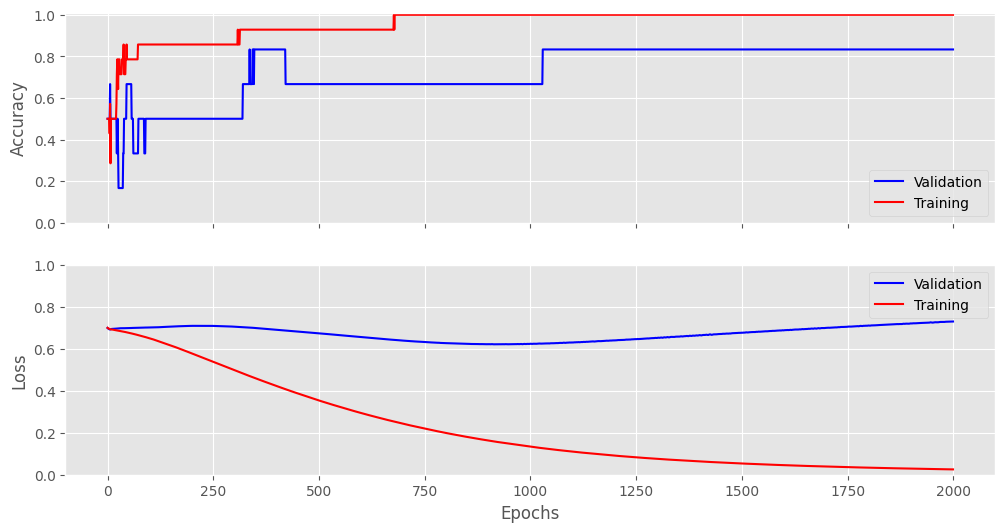

In [16]:
import matplotlib.pyplot as plt
# Define Adam optimiser and set learning rate to 0.001
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# Compile model using sparse categorical cross entropy loss as loss function and the Adam optimiser
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics='accuracy')
EPOCHS = 2000 # Train model for 2000 epochs
# Convert data to numpy arrays
X_train = np.array(training_features)
y_train = np.array(training_labels)
X_test = np.array(test_features)
y_test = np.array(test_labels)
# Train model and store the loss and the metrics for each epoch in the history variable
history = model.fit(x=X_train, y=y_train, validation_data=(X_test,y_test),epochs=EPOCHS,verbose=0)
# Plot training progress
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)
ax1.set_ylim([0, 1.01])
ax1.plot(history.history['val_accuracy'],'b')
ax1.set_ylabel("Accuracy")
ax1.plot(history.history['accuracy'],'r')
ax1.legend(['Validation','Training'])
ax2.set_ylim([0, 1])
ax2.plot(history.history['val_loss'],'b')
ax2.plot(history.history['loss'],'r')
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.legend(['Validation','Training'])

print("Max validation accuracy: %.2f%s" % (max(history.history['val_accuracy'])*100,"%"))
for i in range(EPOCHS):
    if(history.history['val_accuracy'][i] == max(history.history['val_accuracy'])):
        print("Max accuracy reached at epoch",i)
        break

# Exercise 6.1
Using the word embeddings from testvectors.csv, compute the word embeddings of size k for each
 word in the text "Once upon a time, my family was living in an ancient castle.". Then compute
 the pairwise cosine distance between the words in the text and visualise them as a heatmap.
 Repeat this for k = 5, 50, 300. Ignore words for which an embedding is not available.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

text = "Once upon a time, my family was living in an ancient castle."
tokenized_text = text.lower().split()

k_values = [5, 50, 300]
word_embeddings = []

# Compute word embeddings for each word in the text
for word in tokenized_text:
    if word in word_embeddings:
        word_embedding = word_embeddings[word]
        word_embeddings.append(word_embedding)


word_embeddings
# # Convert word_embeddings to a 2-dimensional array
# word_embeddings = np.array(word_embeddings)

# # Compute pairwise cosine distance between word embeddings
# cosine_distances = distance.cdist(word_embeddings, word_embeddings, metric='cosine')

# # Visualize pairwise cosine distance as a heatmap
# fig, ax = plt.subplots()
# heatmap = ax.imshow(cosine_distances, cmap='hot')
# plt.colorbar(heatmap)
# plt.xticks(np.arange(len(tokenized_text)), tokenized_text, rotation=45)
# plt.yticks(np.arange(len(tokenized_text)), tokenized_text)
# plt.title("Pairwise Cosine Distance Heatmap")
# plt.show()


[]